# Matplotlib Assignment

#### Scipy:

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

Task:

1. fitting it to the periodic function

2. plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18



In [1]:
# Solution:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
temp_max = np.array(Max)
temp_min = np.array(Min)

In [3]:
months = np.arange(temp_max.size)
days = np.linspace(0,temp_max.size)

#### Task:

#### 1. Fitting it to the periodic function

In [4]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

#### 2. Plot the fit

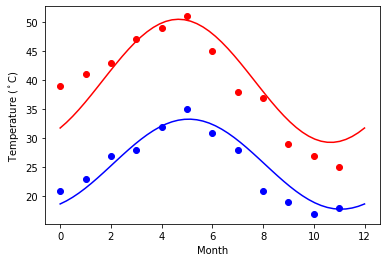

In [5]:
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#### Question 2:
#### Matplotlib:
This assignment is for visualization using matplotlib:

Data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
# Solution for Question 2:

import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
a=titanic['sex'].value_counts()
print(a)
print(a.index)

male      843
female    466
Name: sex, dtype: int64
Index(['male', 'female'], dtype='object')


([<matplotlib.patches.Wedge at 0x7fa7faaaf340>,
 [Text(-0.524549206046674, 1.079281302736133, 'male'),
  Text(0.48083667958064136, -0.9893412391939718, 'female')],
 [Text(-0.30598703686055984, 0.6295807599294108, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

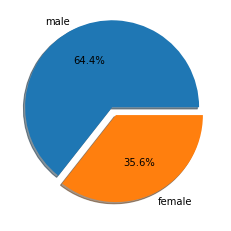

In [8]:
plt.pie(a,explode=(0.1,0),shadow=True, labels=a.index, autopct='%1.1f%%')

In [9]:
gender = titanic['sex'].map({'male':0,'female':1})
gender.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: sex, dtype: float64

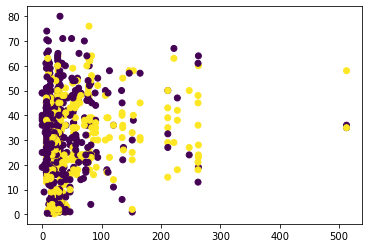

In [10]:
plt.scatter(x='fare',y='age',data=titanic,c=gender)